In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://storage.googleapis.com/rg-ai-bootcamp/assignment-1/fifa21_raw_data.csv'
fifa_df = pd.read_csv(url, low_memory=False)
fifa_df

Task 1: Removing the 'Unnamed: 0' Column

In this first task, you have to deal with unnecessary data in our data set. Specifically, the data set contains a column labeled Unnamed: 0, which does not make a significant contribution to our data analysis needs. Your goal is to effectively remove this column from the FIFA 21 Players data set. Remember that it is very important to manipulate only the unneeded parts of the data and keep the rest intact.

Please make sure to:

Read the CSV file carefully to understand the structure of the data.
Identify a suitable method to remove the specified column from the DataFrame.
Validate that the column has been removed successfully by inspecting the resulting DataFrame.

In [ ]:
# @title #### 01. Removing the 'Unnamed: 0' Column

# Put your code here:
fifa_df2 = fifa_df.drop("Unnamed: 0", axis='columns')

fifa_df2

Task 2: Removing the Newline Characters

In your second task, you will navigate into deeper waters of data cleaning by removing the newline characters (\n) from the dataset. This nuisance feature could occur in various columns and can disrupt accurate data parsing. So, it's an important step to assure the integrity and consistency of our data.

Here are a few tips to guide you on this task:

Start by detecting which columns in the 'FIFA 21 Players' dataset contain newline characters
Develop a strategy to effectively clean the data by replacing or removing these characters
As before, make sure your solution keeps all other aspects of the data untouched
Validate your solution by examining the cleaned dataset to ensure no more newline characters exist

In [ ]:
# @title #### 02. Removing the Newline Characters

# Put your code here:
# fifa_df2['Club'] = fifa_df['Club'].str.replace('\n', '')
fifa_df2['Club'] = fifa_df2['Club'].map(lambda x : x.replace('\n', ''))

print(fifa_df2.to_string())

Task 3: Removing 'Star' Characters

In this third task, we will continue with the theme of data cleaning. Your job in this task is to identify and eliminate the 'star' (★) characters from all the columns in the 'FIFA 21 Players' dataset.

As guidelines for you:

Begin with an overview of the dataset to identify the columns that contain the 'star' (★) characters.
Formulate a strategy to remove these characters without distorting the remaining data in those columns.
Adopt a solution that maintains the integrity of the original data.
Finally, validate your solution by examining the cleaned dataset, ensuring that no 'star' characters remain in any columns.

In [ ]:
# @title #### 03. Removing 'Star' Characters

# Put your code here:
fifa_df3 = fifa_df2

fifa_df3[['W/F', 'SM', 'IR']] = fifa_df3[['W/F', 'SM', 'IR']].apply(lambda x : x.str.replace('★', ''))

print(fifa_df3.to_string())

Task 4: Filling Missing Values

In your fourth task, we turn our attention to missing values in our dataset. 'Loan End Date' and 'Hits' columns in the 'FIFA 21 Players' dataset contain some missing entries, which you are tasked with handling. Specifically, you are to fill the missing values in the 'Loan End Date' column with 'Not on Loan', and for the 'Hits' column, use the string 'Unknown'.

Here are your pointers:

Start with identifying the missing values in the mentioned columns of 'FIFA 21 Players' dataset.
Apply appropriate methods to fill in the missing entries in 'Loan End Date' with 'Not on Loan' and 'Hits' column with 'Unknown', while maintaining the integrity of the existing data.
After filling the missing values, verify that these have been correctly filled by inspecting the final state of your DataFrame.

In [ ]:
# @title #### 04. Filling Missing Values

# Put your code here:
fifa_df3 = fifa_df3.fillna({'Loan Date End': 'Not on Loan', 'Hits': 'Unknown'})

print(fifa_df3.to_string())


Task 5: Cleaning and Converting Financial Data

In this fifth task, we will focus on improving the readability and workability of the financial data within our dataset. Here, you'll need to identify the 'Value', 'Wage', and 'Release Clause' columns in the 'FIFA 21 Players' dataset, which contain '€', 'K', and 'M' characters.

Here's your course of action:

The first step involves eliminating the '€' character in these columns, leaving only numeric values and 'K' or 'M' characters.
After that, you're tasked with interpreting the 'K' and 'M' suffixes in these fields as 'x1000' and 'x1,000,000' respectively and subsequently changing the values in light of this new understanding. For example, 100K must be converted to 100000. We multiply 100 with 1000, do similar things for M.
This interpreted data should then be converted to an 'int' data type, considering that these are financial amounts.
Confirmation of the successful completion of the task can be achieved by validating your dataset once the changes have been made. This task will refine not just your data cleaning capabilities, but also your proficiency in handling and comprehending numerical data.

In [ ]:
# @title #### 05. Cleaning and Converting Financial Data

# Put your code here:
fifa_df4 = fifa_df3

fifa_df4[['Value', 'Wage', 'Release Clause']] = fifa_df4[['Value', 'Wage', 'Release Clause']].replace({'€': '', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(np.int64)

print(fifa_df4.to_string())

DATA VISUALIZATION

Task 6: Pie Chart Visualization of FIFA 21 Players' Preferred Foot

In task six, we'll shift our focus from data cleaning to data visualization. Your project is to create a Pie Chart that illustrates the distribution of the preferred foot (either 'Left' or 'Right') among the FIFA 21 players from the dataset.

Some helpful tips for you:

- Begin by studying the 'Preferred Foot' column in the dataset and understand the structure of the column.
- Then, calculate the frequency or count of players preferring each foot.
- Make use of these frequencies to construct a Pie Chart that clearly lays out this distribution.
- Ensure your Pie Chart is properly labeled with a suitable title, labels for each section (representing 'Left' and 'Right'), and displaying percentages for each section.
- Lastly, display your Pie Chart using appropriate command, and verify that the chart correctly interprets the information in your DataFrame.

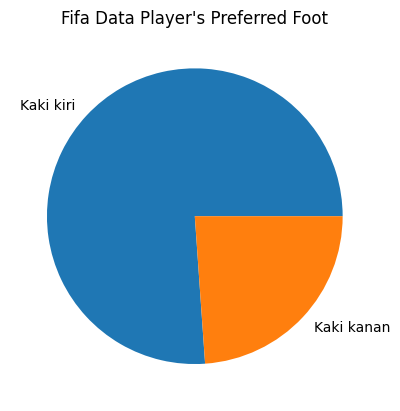

In [77]:
# @title #### 06. Pie Chart Creation - Preferred Foot

# Put your code here:
kaki = fifa_df4['Preferred Foot'].value_counts()

category = kaki.index
totalCategory = kaki.values
labelTotalCategory = ['Kaki kiri', 'Kaki kanan']

plt.pie(totalCategory, labels=labelTotalCategory)

# plt.savefig('preferred-foot.jpg', format='jpeg') # save image
plt.title("Fifa Data Player's Preferred Foot")
plt.show()

Task 7: Bar Plot Visualization of Top 6 FIFA 21 Players

The seventh task entails creating a bar plot to represent the top 6 FIFA 21 players based on their 'OVA' values from the dataset. The 'OVA' column is a vital piece of information that represents the overall rating of a player.

Here's what to consider as you tackle this task:

Start by sorting the dataset in descending order of 'OVA' scores to bring the top-rated players to the top.
Once the data is sorted, extract the top 6 players from our sorted dataset.
The players' 'Name' and 'OVA' values are pertinent to this project; hence ensure these details are captured.
Now, you're all set to create the bar plot, using players' names as the X-axis, and their corresponding 'OVA' ratings on the Y-axis.
Finally, display your plot with suitable labels for each axis, and with an appropriate title verifying its representational accuracy.

In [ ]:
# @title #### 07. Bar Plot Creation - Top 6 Players

# Put your code here: 

# fifa_df4 = fifa_df4['OVA'].sort_values(ascending=False)

print(fifa_df4.to_string())

# plt.savefig('top-6-players.jpg', format='jpeg') # save image
# plt.show()

Task 8: Bar Plot Visualization of Top 8 FIFA Teams with most numbers of Best Players

In your eighth task, the focus shifts to the teams these excellent players belong to. Specifically, you are required to create a Bar Plot that visualizes the top 8 FIFA teams with the most players in the top 100 list, based on the 'OVA' score.

Here's what you need to consider for this task:

Start by sorting the dataset based on the 'OVA' column and take the first 100 records to obtain the top 100 players.
Next, focus on the 'Club' column of these top 100 players and determine the frequencies of each club.
Identify the top 8 clubs with the highest frequencies. These represent the top 8 clubs having the most players in the top 100.
Finally, plot a Bar Plot with the Clubs' names on the X-axis, and the number of top players from each club on the Y-axis.
Make sure to properly label your axes and give a fitting title to your plot, then display this visualization.

In [ ]:
# @title #### 08. Bar Plot Creation - Top 8 Teams with Best Players

# Put your code here:


plt.savefig('best-fifa-teams.jpg', format='jpeg') # save image
plt.show()

Task 9: Bar Plot Visualization of Top 10 FIFA Teams with the most players in Top 100 Valuable Players

Your ninth task invites you to explore the value of teams within the FIFA 21 dataset. Your task is to generate a bar plot that showcases the top 10 FIFA teams with the most number of 'valuable' players. This 'value' pertains to the top 100 players based on their 'Value' attribute in the data set.

Here are guidelines for the project:

Start by sorting the entire data set based on the 'Value' column in descending order to find the players with the highest values.
After creating this sorted data frame, extract the top 100 players for further analysis.
Now shift your focus to the 'Club' attribute, compute the frequency occurrence of each club among these top players.
From these frequencies, derive the top 10 clubs with the most valuable players.
Lastly, plot a Bar Plot using the club names on the X-axis and the frequency of top players on the Y-axis. Ensure your plot includes a suitable title and labels for each axis.
Display and verify the effectiveness of your visualization.

In [ ]:
# @title #### 09. Bar Plot Creation - Top 10 Teams with most Valuable Players

# Put your code here:


plt.savefig('most-valuable-teams.jpg', format='jpeg') # save image
plt.show()

Task 10: Scatter Plot for Underpaid but Valuable Players

For your tenth task, we invite you to create a scatter plot to analyze and visualize FIFA 21 players who, despite their high value, are underpaid.

Your task guidelines are as follows:

Begin by setting up thresholds to define what we consider as 'high value' and 'low wage'. For instance, players in the top 25% in terms of 'Value' can be considered as high value, and those who fall in the bottom 25% for 'Wage' can be deemed as underpaid.
Using these defined thresholds, identify the subset of players who are considered high value but underpaid.
Now it's time to visualize: create a scatter plot where each point represents a player. You will plot all players in one color, while the underpaid and valuable players should be visibly distinguished.
Make sure to include appropriate labels for axises and a title to your plot, ensuring clarity and insight into what's being visualized.

In [ ]:
# @title #### 10. Scatter Plot Creation - High Value, Underpaid Players

# Put your code here:
x = fifa_df4['Value']
y = fifa_df4['Wage']

plt.scatter(x, y, label='All Player')


highValueThres = fifa_df4['Value'].quantile(0.75)
lowWageThres = fifa_df4['Wage'].quantile(0.25)

highValueUnderpaid = fifa_df4[(fifa_df4['Value'] >= highValueThres) & (fifa_df4['Wage'] <= lowWageThres)]

x1 = highValueUnderpaid['Value']
y1 = highValueUnderpaid['Wage']

plt.scatter(x1,y1, label='High Value Underpaid Player')

plt.legend()
plt.ylabel("Player's Value")
plt.xlabel("Player's Wage")
plt.show()